# Analyse des Einsatzes von Erschließungsstrategien beim Lesen

Am 2. 3. 2018 wurden an der Universität Valencia in zwei DaF-Gruppen (A2, B2) Daten zum wahrgenommenen Strategieneinsatz der Lernenden bei der Bearbeitung einer Aufgabe zum Lesen und Verstehen des neuen Wortschatzes erhoben.
Die Studierenden wurden gebeten, beim Lesen eines Textes aus dem Lehrwerk zunächst alle für sie neuen Wörter zu markieren (unabhängig von deren Verständnis). Nach einem zweiten Lesedurchgang sollten sie diese in eine Liste eintragen und angeben, welche Strategien sie angewendet hätten, um deren Bedeutung zu erkennen. 
Ein Teil der Lernenden hatte zuvor (freiwillig) an der Befragung zum Thema Erschließungsstrategien für unbekannten Wortschatz im Deutschen durch Lernende an spanischen Universitäten teilgenommen (siehe: http://diarium.usal.es/martinakienberger/200-2/?lang=de). Für alle Studierenden wurde kurz das Thema erklärt und Beispiele für Strategien gegeben. 

### Vorbereitung - Datenreinigung

In [25]:
import pandas as pd
import numpy as np
from biofes import biplot
from sklearn.utils.extmath import randomized_svd
from sklearn.cluster import KMeans, AgglomerativeClustering
from adjustText import adjust_text
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [26]:
Rohdaten = pd.read_excel('D:\Daten\DISS\Daten\Granada.xlsx')

In [27]:
Rohdaten.head(3)

,Grupo,ID_alumno,Encuesta,Palabra,Estrategia_1,Estrategia_2,Estrategia_Esp_1,Estrategia_Esp_2,Comentario
0,A1,1,1,Himmel,Con,NaN,NaN,NaN,NaN
1,A1,1,1,scheint,Con,NaN,NaN,NaN,NaN
2,A1,1,1,überall,Dicc,NaN,NaN,NaN,NaN


In [28]:
Daten = Rohdaten

Alle IDs der Gruppe Granada konnten für die Auswertung genutzt werden.

#### Auswahl der für die Analyse relevanten Teile der Erhebung

In [29]:
cols = ['Grupo','ID_alumno','Encuesta','Palabra','Estrategia_1','Estrategia_2']

In [30]:
data = Daten[cols]

In [31]:
data.loc[118]

Grupo                             A1
ID_alumno                          6
Encuesta                           1
Palabra         Schlittenhunderennen
Estrategia_1                      AL
Estrategia_2                     NaN
Name: 118, dtype: object

(Weitere in der Excel-Tabelle erfasste Informationen dienten einerseits zur Entscheidung für Aufnahme in oder Ausschluss aus der Analyse und können andererseits für spätere, detaillierte Analysen herangezogen werden.)

## Analyse des Strategieneinsatzes

### Gruppe A1

In [32]:
A1 = data[data.Grupo == 'A1']

In [33]:
print(r'Teilnehmer: ' + str(len(A1.ID_alumno.unique()))+'\n'+
      r'TN + Online-Befragung: ' + str(len(A1[A1.Encuesta == 1].ID_alumno.unique()))+'\n'+
      r'TN - Online-Befragung: ' + str(len(A1[A1.Encuesta == 2].ID_alumno.unique()))+'\n'+
      r'TN ? Online-Befragung: ' + str(len(A1[A1.Encuesta == 0].ID_alumno.unique())))

Teilnehmer: 17
TN + Online-Befragung: 17
TN - Online-Befragung: 0
TN ? Online-Befragung: 0


Die Gruppe besteht aus 17 Teilnehmern, von denen alle an der Online-Befragung teilgenommen haben. (Diese wurde in der Unterrichtszeit durchgeführt.)

#### Als "neu" identifizierte Wörter (A1)

In [34]:
len(A1.Palabra.unique())

73

73 unterschiedliche Wörter wurden von den Lernenden als für sie "neu" angegeben. Bei der Datenübertragung von den Aufgabenblättern in Excel wurden orthographische Fehler berichtigt. Die Wörter wurden in der jeweiligen Schreibung des Originaltextes aus dem Lehrbuch übernommen (auch wenn die Lernenden teilweise stattdessen eine andere Form, z.B. Infinitiv, angegeben hatten).

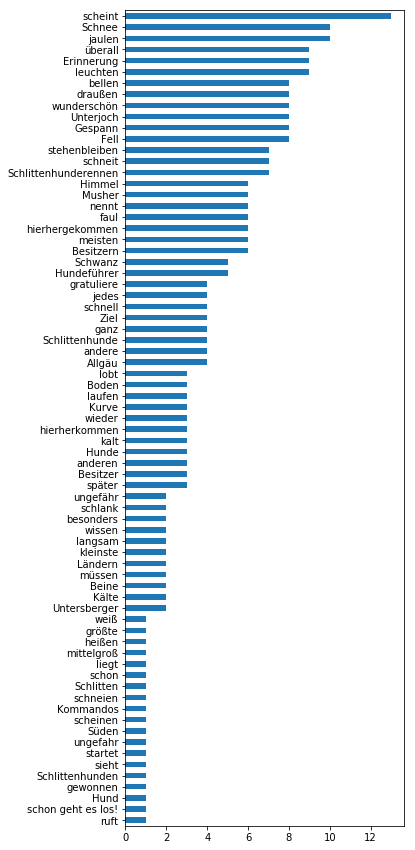

In [35]:
A1.Palabra.value_counts(ascending = True).plot(kind = 'barh', figsize = (5,15));

#### Kreuztabelle Studenten - neue Wörter (A1)

In [36]:
Al_Pal_A1 = pd.crosstab(A1.ID_alumno, A1.Palabra, margins = True)

In [37]:
Al_Pal_A1.T.head()

ID_alumno,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,All
Palabra,,,,,,,,,,,,,,,,,,
Allgäu,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,4
Beine,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,2
Besitzer,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3
Besitzern,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,1,6
Boden,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3


In [38]:
print(r'Durchschnittlich als "neu" identifizierte Wortanzahl: '+str(Al_Pal_A1['All'][:-1].mean()))

Durchschnittlich als "neu" identifizierte Wortanzahl: 16.88235294117647


In [39]:
print(r'Minimum der als "neu" identifizierten Wörter: '+str(A1.ID_alumno.value_counts().min()) + '\n' +
      r'Maximum der als "neu" identifizierten Wörter: '+str(A1.ID_alumno.value_counts().max()))

Minimum der als "neu" identifizierten Wörter: 4
Maximum der als "neu" identifizierten Wörter: 34


Durchschnittlich wurden ca. 13 Wörter als "neu" identifiziert. Große Schwankungsbreite: zwischen 4 und 27 (siehe oben).

##### Histogramm

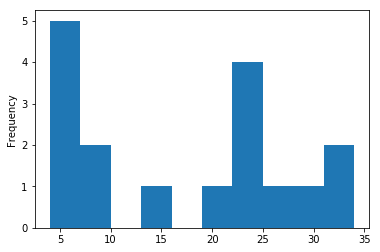

In [40]:
A1.ID_alumno.value_counts().plot(kind = 'hist',
                                bins = 10);

Das Histogramm zeigt die Frequenz der notierten Wortanzahl pro TN - keine Normalverteilung in diesem Fall.

#### Einsatz von Erschließungsstrategien (A1)

Die freien Angaben der Lernenden zu den ihrer Ansicht nach eingesetzten Strategien wurden den Hauptkategorien aus der Online-Befragung zu Erschließungsstrategien unter DaF-Lernenden an spanischen Universitäten (siehe http://diarium.usal.es/martinakienberger/200-2/?lang=de) zugeordnet und entsprechend in Excel erfasst:

* L1 = Descubro el significado o la función de palabras nuevas en alemán gracias a mi lengua materna. (Ich erschließe die Bedeutung oder Funktion unbekannter deutscher Wörter mit Hilfe meiner Muttersprache.)
* LE = Descubro el significado o la función de palabras nuevas en alemán con la ayuda de otras lenguas. (Ich erschließe unbekannte Wörter mit Hilfe anderer Sprachen.)
* AL = Utilizo mis conocimientos de alemán, p. ej. otras palabras conocidas, clases de palabras o la formación de palabras compuestas. (Ich nutze mein Wissen über das Deutsche, z.B. andere bekannte Wörter, Wortarten oder Kompositabildung.)
* Con = Utilizo información extraída del contexto, p. ej. la posición de una palabra en la frase o el formato del texto. (Ich nutze Informationen aus dem Kontext, z.B. die Position eines Wortes im Satz oder die Gestaltung des Textes.)
* Prof = Pido ayuda a mi profesor/a. (Ich bitte meinen Lehrer/meine Lehrerin um Hilfe.)
* Co = Pido ayuda a mis compañeros/as de clase. (Ich bitte die anderen Kursteilnehmer/innen um Hilfe.)
* Dicc = Consulto un diccionario u otra fuente (en papel o digital). (Ich konsultiere ein Wörterbuch oder eine andere Quelle (Printversion oder digital).)

Vgl. Erklärungen und Beispiele in "Datenanalyse_Voc_Valencia" und "Datenanalyse_Voc_Salamanca".

In [41]:
A1.Estrategia_1.value_counts()

Dicc    91
Con     60
AL      40
Co      25
LE      22
Prof     6
L1       4
Name: Estrategia_1, dtype: int64

In [42]:
A1.Estrategia_2.value_counts()

Dicc    6
AL      4
Con     3
LE      3
Prof    1
Name: Estrategia_2, dtype: int64

In [43]:
v1 = A1.Estrategia_1.value_counts()
v2 = A1.Estrategia_2.value_counts()

In [46]:
v = v1 + v2
v['L1'] = v1['L1']
v['Co'] = v1['Co']

Da die Angaben einiger Studierender zwei Strategien zugeordnet werden können, müssen die Nennungen für die Gesamtauswertung zusammengezählt werden.

In [47]:
v.sort_values(ascending = False)

Dicc    97.0
Con     63.0
AL      44.0
LE      25.0
Co      25.0
Prof     7.0
L1       4.0
dtype: float64

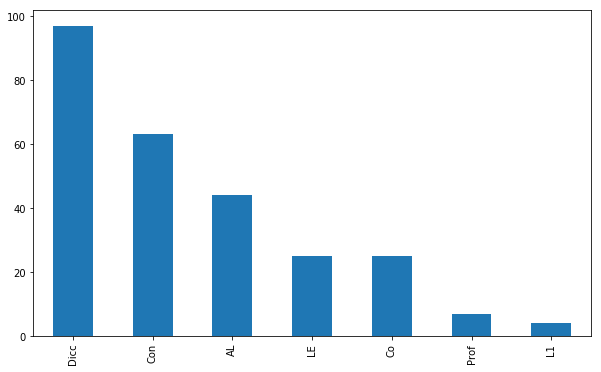

In [48]:
v.sort_values(ascending = False).plot(kind = 'bar', 
                                      #title = 'Angaben zu eingesetzten Strategien',
                                     figsize = (10,6));

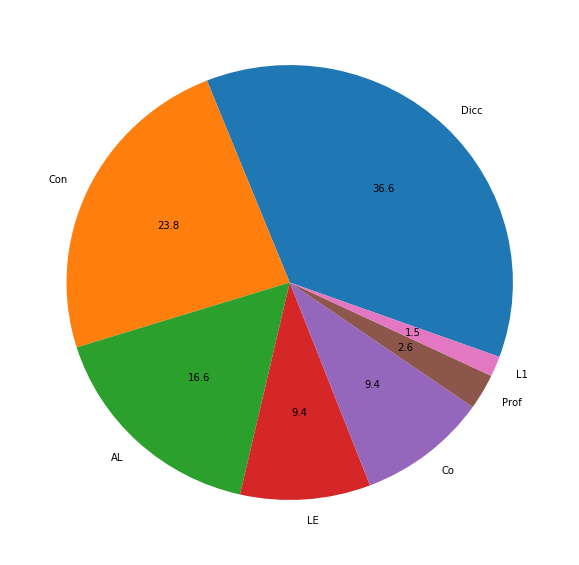

In [49]:
ax = v.sort_values(ascending = False).plot(kind = 'pie', 
                                           #title = 'Angaben zu eingesetzten Strategien', 
                                           figsize = (10,10),
                                           autopct='%.1f', startangle = -20);

ax.set_ylabel("");

Die beiden Diagramme zeigen, mit welcher Häufigkeit die unterschiedlichen Arten von Strategien in der Gesamtgruppe eingesetzt wurden.

In der Folge wird untersucht, wie sich das strategische Verhalten der einzelnen Lernenden unterscheidet. Für die Analyse wird mit einer Kreuztabelle und Biplot gearbeitet. Zuletzt wird versucht, durch eine Cluster-Analyse Gruppen von Individuen mit ähnlichem Strategieneinsatz zu bilden.

#### Kreuztabelle Studenten - verwendete Strategien (A1)

In [50]:
CTA1 = pd.crosstab(A1.ID_alumno, A1.Estrategia_1, margins = True)

CTA1_2 = pd.crosstab(A1.ID_alumno, A1.Estrategia_2, margins = True)

In [51]:
for val in CTA1_2.index:
    for col in CTA1_2.columns:
        if CTA1_2.loc[val,col]!=0:
            CTA1.loc[val,col] = CTA1.loc[val,col]+ CTA1_2.loc[val,col]

In [52]:
CTA1

Estrategia_1,AL,Co,Con,Dicc,L1,LE,Prof,All
ID_alumno,,,,,,,,
1,3,8,4,10,1,0,0,26
2,1,2,6,11,0,2,0,22
3,4,4,6,11,0,0,1,26
4,8,2,7,11,0,5,0,33
5,0,0,3,1,0,0,0,4
6,3,1,1,7,0,0,0,12
7,3,0,3,13,1,4,0,24
8,3,0,6,14,0,1,0,24
9,4,0,11,7,0,4,2,28


#### Korrespondenzanalyse und Biplot Studenten - verwendete Strategien (A1)

In [54]:
#CA_A1L = biplot.CA(CTA1.values[:-1,:-1], 7, method = 1)

Mit den Daten der Kreuztabelle kann eine Korrespondenzanalyse durchgeführt werden, um die Beziehungen zwischen Elementen und Variablen grafisch repräsentieren zu können.

Eine Alternative stellt der Biplot dar, der besser geeignet ist, um Dimensionen der Darstellung zu reduzieren.

In [55]:
Biplot_A1L = biplot.Classic(CTA1.values[:-1,:-1], 7, method = 1)

In [56]:
R = Biplot_A1L.RowCoord
C = Biplot_A1L.ColCoord
cr = Biplot_A1L.RowCont
cc = Biplot_A1L.ColCont

##### Qualität der Repräsentation der Elemente und Variablen auf den Achsen des Biplots

In [57]:
Biplot_A1L.Inert

array([ 34.11163144,  24.85892712,  18.22320109,  10.36199183,
         6.52241846,   3.70092203,   2.22090803])

Überblick über Informationsgehalt der einzelnen Achsen des Biplot (hier 7)

In [58]:
pd.DataFrame(cr, columns = ['Axis_'+str(el+1) for el in range(7)], index = CTA1.index[:-1])

,Axis_1,Axis_2,Axis_3,Axis_4,Axis_5,Axis_6,Axis_7
ID_alumno,,,,,,,
1,0.192328,48.285887,29.858945,19.554050,1.739133,0.234895,0.134762
2,13.917578,0.205027,33.723765,31.800686,12.692214,6.899531,0.761199
3,11.399402,0.587376,65.640460,6.947569,3.822508,11.589920,0.012764
4,77.569203,2.424959,0.541522,4.452387,10.985393,2.992679,1.033856
5,66.992539,7.970264,0.651795,10.126107,0.028257,1.321934,12.909104
6,32.654494,5.918374,2.880415,26.185540,13.486468,17.339586,1.535122
7,23.618405,22.013625,16.449233,3.886272,28.993161,0.651833,4.387471
8,18.869083,0.067145,10.032074,49.551306,1.846358,15.498147,4.135887
9,51.437077,42.678335,0.603677,4.451454,0.275247,0.006862,0.547347


In [59]:
pd.DataFrame(cc, columns = ['Axis_'+str(el+1) for el in range(7)], index = CTA1.columns[:-1])

,Axis_1,Axis_2,Axis_3,Axis_4,Axis_5,Axis_6,Axis_7
Estrategia_1,,,,,,,
AL,51.884179,14.142411,5.946834,1.091355,23.957686,2.973326,0.004209
Co,0.229866,23.078176,55.168274,15.938716,0.939654,4.089411,0.555903
Con,69.080515,14.768045,6.127555,0.427989,0.657519,0.678749,8.259628
Dicc,45.713724,5.979666,23.836016,11.749445,6.022685,5.342799,1.355666
L1,1.009047,51.807002,17.139436,15.917145,12.835932,0.775949,0.515489
LE,66.894951,0.419790,19.282638,0.544386,0.849939,9.029388,2.978909
Prof,3.969138,63.817401,0.061656,26.864907,0.393513,3.016832,1.876552


Interpretation:

Um beispielsweise eine gute Repräsentation von Strategie "AL" zu erhalten, müssen für eine Darstellung in 2 Dimensionen Achse 1 und 5 gewählt werden. Für "L1" wären Achse 3 und 2 geeignet.
(Für die Programmierung in Python ist zu beachten, dass "1" dem Wert "0" entspricht usw.)

#### Cluster-Analyse Studenten - verwendete Strategien (A1)

Mit den Werten der Kreuztabelle können auch Cluster berechnet werden, um Gruppen differenzieren zu können.

Diese können in der Folge in einer Grafik mit den Ergebnissen des Biplots dargestellt werden.

In [60]:
#kmeans = KMeans(n_clusters=5, random_state=0).fit(CTA1.values[:-1,:-1])
#ward = AgglomerativeClustering(n_clusters=5).fit(CTA1.values[:-1,:-1])

Beide Berechnungsarten führen zu ähnlichen Ergebnissen, in der Folge wird "ward" verwendet.

Tests mit unterschiedlicher Anzahl an Clustern zeigen, dass 5 bis 6 Gruppen unterschieden werden können, wobei 2 dieser "Gruppen" von jeweils nur einem TN gebildet werden.

##### Darstellung Biplot + Cluster

In [61]:
def vector_to_shape(v):
    markers = ["," , "o" , "v" , "^", "x", "D", "*"]
    return [markers[el] for el in v]

In [62]:
def vector_to_color(v):
    col = ['b', 'g', 'r', 'c', 'm', 'k', 'y']
    return [col[el] for el in v]

In [63]:
def graf_cplot(data, dim, nclust, dim1 = 0, dim2 = 1, sx = 10, sy = 10):
    
    B = biplot.Classic(data, dim, method = 1) 
    R = B.RowCoord
    C = B.ColCoord
    
    ward = AgglomerativeClustering(n_clusters=nclust).fit(data)
    
    fig = plt.figure(figsize=(sx,sy))
    ax = fig.add_subplot(111)

    sh_v = vector_to_shape(ward.labels_)
    color_v = vector_to_color(ward.labels_)

    for i in range(C.shape[0]):
        ax.arrow(0,0,C[i,dim1],C[i,dim2], alpha = 0.7)
        #ax.scatter(C[i,dim1],C[i,dim2]) # Hier würden Linien nicht angezeigt.
        ax.text(C[i,dim1],C[i,dim2],data.columns[i],fontsize=20, alpha = 0.7)

    for i in range(R.shape[0]):
        ax.scatter(R[i,dim1],R[i,dim2], s = 20, c = color_v[i] ,marker = sh_v[i])
    
    texts = [plt.text(R[i,dim1],R[i,dim2], data.index[i], ha='center', va='center') for i in range(len(R[:,0]))]
    adjust_text(texts);

In [62]:
def graf_cplot1(data, dim, nclust, dim1 = 0, dim2 = 1, sx = 10, sy = 10):
    
    B = biplot.CA(data, dim, method = 1) 
    R = B.RowCoordinates
    C = B.ColCoordinates
    
    ward = AgglomerativeClustering(n_clusters=nclust).fit(data)
    
    fig = plt.figure(figsize=(sx,sy))
    ax = fig.add_subplot(111)

    sh_v = vector_to_shape(ward.labels_)
    color_v = vector_to_color(ward.labels_)

    for i in range(C.shape[0]):
        ax.arrow(0,0,C[i,dim1],C[i,dim2], alpha = 0.7)
        #ax.scatter(C[i,dim1],C[i,dim2]) # Hier würden Linien nicht angezeigt.
        ax.text(C[i,dim1],C[i,dim2],data.columns[i],fontsize=20, alpha = 0.7)

    for i in range(R.shape[0]):
        ax.scatter(R[i,dim1],R[i,dim2], s = 20, c = color_v[i] ,marker = sh_v[i])
    
    texts = [plt.text(R[i,dim1],R[i,dim2], data.index[i], ha='center', va='center') for i in range(len(R[:,0]))]
    adjust_text(texts);

Die bevorzugte Form der Visualisierung wird als Funktion definiert (vgl. "Datenanalyse_Voc_Valencia") und in der Folge für alle weiteren Biplot/Cluster-Darstellungen verwendet. (Die Funktion beinhaltet bereits die Berechnung des Biplots bzw. der Korrespondenzanalyse sowie der Cluster.)

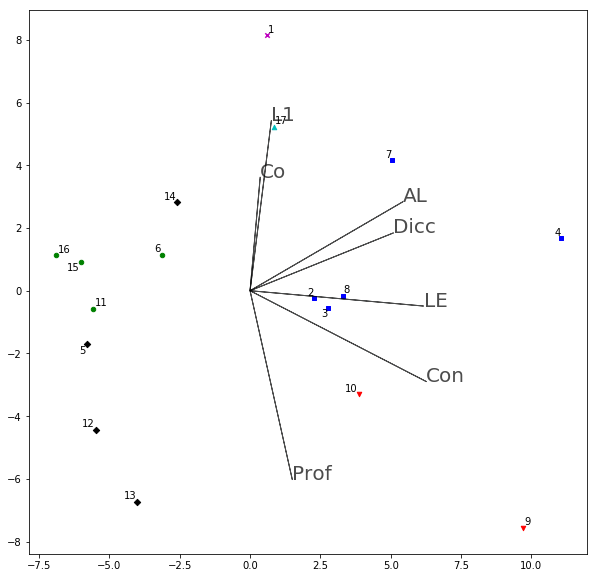

In [66]:
graf_cplot(CTA1.iloc[:-1,:-1], 7, 6)

#### Kreuztabelle Wörter - verwendete Strategien (A1)

In [71]:
Pal_Es_A1 = pd.crosstab(A1.Palabra, A1.Estrategia_1, margins = True)
Pal_Es_A1_2 = pd.crosstab(A1.Palabra, A1.Estrategia_2, margins = True)

In [72]:
for val in Pal_Es_A1_2.index:
    for col in Pal_Es_A1_2.columns:
        if Pal_Es_A1_2.loc[val,col]!=0:
            Pal_Es_A1.loc[val,col] = Pal_Es_A1.loc[val,col]+ Pal_Es_A1_2.loc[val,col]

In [73]:
Pal_Es_A1.sort_values(['All'], ascending=[0]).head()

Estrategia_1,AL,Co,Con,Dicc,L1,LE,Prof,All
Palabra,,,,,,,,
All,44,25,63,97,4,25,7,265
scheint,0,2,7,0,0,7,0,16
jaulen,0,1,6,4,0,0,0,11
Schnee,0,1,1,7,0,1,0,10
überall,1,0,1,2,0,4,1,9


In dieser Kreuztabelle werden als neu identifizierte Wörter mit den angegebenen Strategien in absteigender Frequenz dargestellt.

#### Korrespondenzanalyse und Biplot Wörter - verwendete Strategien (A1)

In [67]:
#Biplot_A1W = biplot.Classic(Pal_Es_A1.values[:-1,:-1], 7, method = 1)

In [68]:
#R = Biplot_A1W.RowCoord
#C = Biplot_A1W.ColCoord
#cr = Biplot_A1W.RowCont
#cc = Biplot_A1W.ColCont

#### Cluster

In [69]:
#kmeans = KMeans(n_clusters=4, random_state=0).fit(Pal_Es_A1.values[:-1,:-1])
#ward = AgglomerativeClustering(n_clusters=4).fit(Pal_Es_A1.values[:-1,:-1])

Beide Berechnungsarten führen zu ähnlichen Ergebnissen, in der Folge wird "ward" verwendet.

##### Darstellung Biplot + Cluster

In [74]:
def graf_cplot2(data, dim, nclust, dim1 = 0, dim2 = 1, sx = 10, sy = 10):
    
    B = biplot.Classic(data, dim, method = 1) 
    R = B.RowCoord
    C = B.ColCoord
    
    ward = AgglomerativeClustering(n_clusters=nclust).fit(data)
    
    fig = plt.figure(figsize=(sx,sy))
    ax = fig.add_subplot(111)
    
    color_v = vector_to_color(ward.labels_)

    for i in range(C.shape[0]):
        ax.arrow(0,0,C[i,dim1],C[i,dim2], alpha = 0.7)
        #ax.scatter(C[i,0],C[i,1])
        ax.text(C[i,dim1],C[i,dim2],data.columns[i],fontsize=20, alpha = 0.7)
        
    ax.scatter(R[:,dim1],R[:,dim2], s = 0.5, c = color_v[i])
    
    texts = [plt.text(R[i,dim1],R[i,dim2], data.index[i], ha='center', va='center', color=color_v[i]) for i in range(len(R[:,0]))]
    adjust_text(texts);

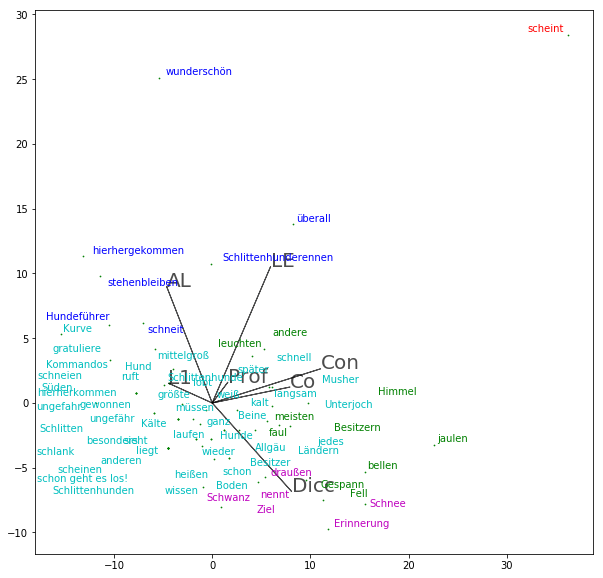

In [77]:
graf_cplot2(Pal_Es_A1.iloc[:-1,:-1],7, 5)

Die Gruppierung der als "neu" identifizierten Wörtern in Hinblick auf die zu ihrer Erschließung eingesetzten Strategien zeigt, dass bestimmte Wörter (vermutlich abhängig von Wortart, Ko- und Kontext) den Einsatz bestimmter Strategien nahe legen.